# Pré-processamento de dados:

- Realizando a Interpolação
- Subtraindo baseline (Método ASLS)

In [18]:
import numpy as np
import pandas as pd

import ramanspy as rp
from ramanspy.preprocessing.baseline import ASLS

baseline = ASLS(

)

def interpolar(
    path_in: str,
    path_out: str,
    x_start: float = 200.0,
    x_end: float = 1800.0,
    n_points: int = 1600,
    sep: str = "\t",
    decimal_in: str = ",",
    decimal_out: str = "."
):
    df = pd.read_csv(path_in, sep=sep, header=None, names=["x", "y"], decimal=decimal_in)

    x = df["x"].to_numpy()
    y = df["y"].to_numpy()

    x_new = np.linspace(x_start, x_end, n_points)
    y_new = np.interp(x_new, x, y)

    x_min, x_max = x[0], x[-1]
    m_left = (y[1] - y[0]) / (x[1] - x[0])
    m_right = (y[-1] - y[-2]) / (x[-1] - x[-2])

    mask_left = x_new < x_min
    mask_right = x_new > x_max

    y_new[mask_left] = y[0] + m_left * (x_new[mask_left] - x_min)
    y_new[mask_right] = y[-1] + m_right * (x_new[mask_right] - x_max)

    y_min, y_max = y_new.min(), y_new.max()
    y_new = (y_new - y_min) / (y_max - y_min)


    spectrum = rp.Spectrum(y_new, x_new)
    new_spectrum = baseline.apply(spectrum)

    out = pd.DataFrame({"x": new_spectrum.spectral_axis, "y": new_spectrum.spectral_data})

    out.to_csv(path_out, sep=sep, index=False, header=False, float_format="%.10f", decimal=decimal_out)


# Visualizando dados processados e brutos:

Observe que não há uma grande distorção. Então, podemos continuar utilizando a interpolação sem que o Raman Shift seja fortemente afetado.

Ps.: note que os pontos antes de 100 $cm^{-1}$ foram retirados por não serem de fato um pico, mas, sim, um ruído que tem origem de fótons Rayleigh por causa de um erro de calibração e da rejeição finita do filtro.

In [19]:
interpolar("data/raw/PE_glicol_mm4000.txt", "data/processed/PE_glicol_mm4000.txt")

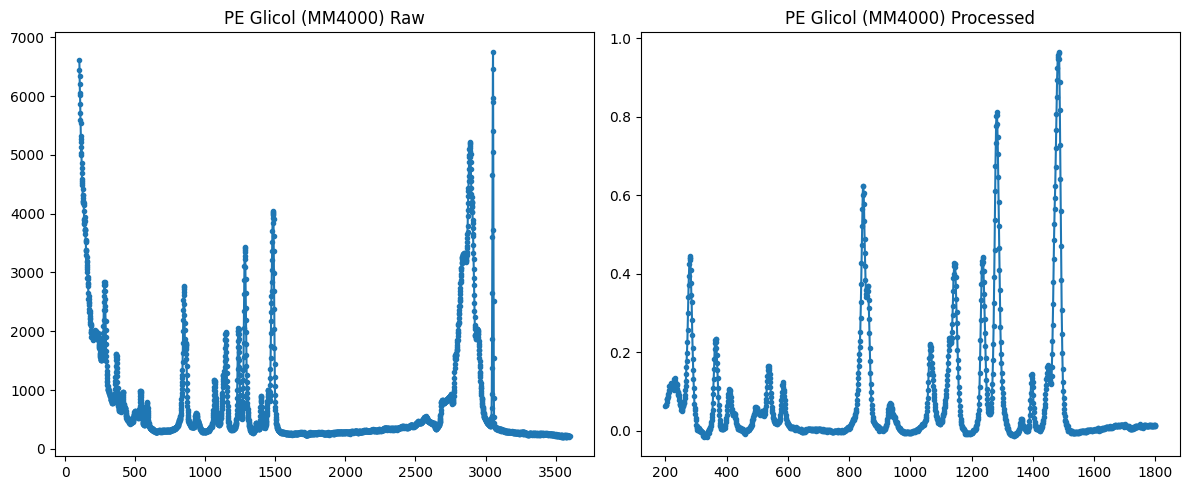

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv("data/raw/PE_glicol_mm4000.txt", sep="\t", header=None, names=["x", "y"], decimal=",")
df2 = pd.read_csv("data/processed/PE_glicol_mm4000.txt", sep="\t", header=None, names=["x", "y"], decimal=".")

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(df1["x"], df1["y"], "o-", markersize=3)
axs[0].set_title("PE Glicol (MM4000) Raw")
axs[1].plot(df2["x"], df2["y"], "o-", markersize=3)
axs[1].set_title("PE Glicol (MM4000) Processed")

plt.tight_layout()
plt.show()

# Agora sim...

In [21]:
interpolar("data/raw/CeraDePolietileno-633nm.txt", "data/processed/CeraDePolietileno-633nm.txt")
interpolar("data/raw/CeraDePolietileno-785nm.txt", "data/processed/CeraDePolietileno-785nm.txt")
interpolar("data/raw/PE_glicol_mm10000.txt", "data/processed/PE_glicol_mm10000.txt")
interpolar("data/raw/Poliisopreno_trans_633nm.txt", "data/processed/Poliisopreno_trans_633nm.txt")
interpolar("data/raw/Poliisopreno_trans_785nm.txt", "data/processed/Poliisopreno_trans_785nm.txt")
interpolar("data/raw/Polipropileno.txt", "data/processed/Polipropileno.txt")
interpolar("data/raw/PVA_altaMM.txt", "data/processed/PVA_altaMM.txt")
interpolar("data/raw/PVA_mediaMM.txt", "data/processed/PVA_mediaMM.txt")